# Predicting CLTV and Customer Repeat with Machine Learning for Shopify 

#### A Data Science Analysis Project by Benjamin N. Bellman 

![image.png](..\Images\online-shopping-credit-cards.jpg)

###  Project Table of Contents: 
<br />

**I. INTRODUCTION \& PRELIMINARY ANALYSIS** 
- 1. Project Purpose 
- 2. Loading \& Previewing Data   
- 3. Data Wrangling  
- 4. Preliminary EDA 
 
**II. DATA WRANGLING**  
- 1. Cleaning up data. 
- 2. Creating 3 separate dataframes.
- 3. Creating the final 1 year CLTV Table.

**III. EXPLORATORY DATA ANALYSIS**     
- 1. Loading an Previewing the New Table  
- 2. Exploring relationships of variables on Post First Week Spend 

**IV. PREPROCESSING AND MODELLING**
- 1. Linear Models
- 2. Classification Models


###  Project Purpose.

<p> Welcome to this Tutorial on Extracting Shopify Data to create a Customer Lifetime Value (CLTV) Analysis! This notebook will walk you through the steps so you too can replicate this for your business! 

<p> As of 2021, e-commerce is, worldwide, a $4.89 trillion industry. One of the leading platforms in the marketplace is Shopify which currently holds a 23% market share in the United States with over 2.6 million live stores. For Perspective, there is about 1 store for every 130 Americans. With e-commerce expected to keep growing in the future, it is important for current and future Shopify store-owners to get the most use  of the available data the platform provides.
This project will apply the Data Science method to learn more about customer behavior  and create a Customer Lifetime Value Analysis (CLTV) with some Machine Learning techniques from Shopify Data. The purpose will be to understand what makes customers become repeat customers and use the information collected to generate more revenue by increasing LTV. 

<p> Shopify data is usually standardized when exporting orders in csv format. In this dataset, the original raw export is  organized where each row represents an item sold with ~73 columns that provide information on the item purchased. Most of these will not be useful for this analysis and dropped early on. 

<br> **Featured columns include:**

- *Name*: This refers to the Order Id. This is not unique, as there can be multiple items in one order. 
- *Email*: This is the email of the customer, which is used to identify a customer. 
- *Paid at*: This column refers to the time and date the transaction occurred. There is only one date for each Order, so it is normal if there are blanks provided. Other columns follow this logic 
- *Subtotal*: This refers to the subtotal for each order.  
- *Lineitem name*: This refers to the name of the product. Typically, a store sets up the product name where we can get information such as the size, type and color of the product in question. This column should never be empty. 
- *Line Item Quantity and Line Item Price*: These columns design how much of each item and their price, respectively, and shouldn’t contain missing values. 

How a shopify store is organized to collect data may result in possible missing values or incomplete transactions(as was the case for this company). The analysis will clean some data but assumes that there are no missing values in the “Created at”,  “Lineitem name”, and “LineItem Price” columns since all of these refer to each individual item sold and if there is missing data in these, they will need to be dropped. For a more detailed guide on understanding shopify data and more details on the columns, please refer to this sheet.
The data used for this analysis comes from a real company which generated $1 million in YTD revenue. The data has been modified from its original version to protect the anonymity of the company as well as the information of all its customers. 

<br> The original export file which will be analyzing  has been modified with the following alterations: 

- Columns *“Billing Name “ , “ Billing Street“ , “Billing Address1 “ , “Billing Address2 “ , “Billing Company “ , “Billing Phone “ , “Shipping Name “ , “ Shipping Street“ , “Shipping Address1 “ , “Shipping Address2 “ , “Shipping Company “ , “Shipping Phone “*  have all been replaced with null values. These columns will not be used in the analysis and dropped early on shortly after the introduction .
- Values in the *“Email”* column have been replaced with a unique Email Id for each customer instead of their actual emails. 
- Column *“Line-item name”* has substituted product names. 

 


### 1. Loading our packages and Dataframe. 

In [1]:
## We start by importing the appropriate packages which we will want to use. 
import pandas as pd
import numpy as np
from datetime import datetime as dt
import matplotlib.pyplot as plt
from datetime import timedelta
import seaborn as sns
import warnings
import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot 
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split 
from sklearn import linear_model, preprocessing
%matplotlib inline
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [2]:
## We create our dataframe with the raw data.
raw_data = pd.read_csv('..\\.\\original_data.csv')

### 2. Previewing our data.

In [3]:
# We preview the first 5 rows of our dataframe.
raw_data.head()

,Name,Email,Financial Status,Paid at,Fulfillment Status,Fulfilled at,Accepts Marketing,Currency,Subtotal,Shipping,Taxes,Total,Discount Code,Discount Amount,Shipping Method,Created at,Lineitem quantity,Lineitem name,Lineitem price,Lineitem compare at price,Lineitem sku,Lineitem requires shipping,Lineitem taxable,Lineitem fulfillment status,Billing Name,Billing Street,Billing Address1,Billing Address2,Billing Company,Billing City,Billing Zip,Billing Province,Billing Country,Billing Phone,Shipping Name,Shipping Street,Shipping Address1,Shipping Address2,Shipping Company,Shipping City,Shipping Zip,Shipping Province,Shipping Country,Shipping Phone,Notes,Note Attributes,Cancelled at,Payment Method,Payment Reference,Refunded Amount,Vendor,Id,Tags,Risk Level,Source,Lineitem discount,Tax 1 Name,Tax 1 Value,Tax 2 Name,Tax 2 Value,Tax 3 Name,Tax 3 Value,Tax 4 Name,Tax 4 Value,Tax 5 Name,Tax 5 Value,Phone,Receipt Number,Duties,Billing Province Name,Shipping Province Name,Payment Terms Name,Next Payment Due At
0,#29489,Anonymous4245,paid,11/11/2021 16:53,unfulfilled,NaN,no,USD,142.0,0.00,11.72,153.72,NaN,0.0,Free Shipping,11/11/2021 16:53,1,Mint Crossback Sports Bra - S,38.0,NaN,100.0,True,True,pending,NaN,NaN,NaN,NaN,NaN,DIXON,'61021,IL,US,NaN,NaN,NaN,NaN,NaN,NaN,DIXON,'61021,IL,US,NaN,NaN,NaN,NaN,Shopify Payments,c29208367530214.1,0.0,NaN,4.550000e+12,NaN,Low,web,0.0,Dixon City Tax 0.5%,0.71,Illinois State Tax 6.25%,8.88,Lee County Tax 1.5%,2.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Illinois,Illinois,NaN,NaN
1,#29489,Anonymous4245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11/11/2021 16:53,1,Black/Burgundy Contour Leggings - XS,52.0,NaN,300.0,True,True,pending,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,#29489,Anonymous4245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11/11/2021 16:53,1,Black/Mint Contour Leggings - XS,52.0,NaN,100.0,True,True,pending,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,#29488,Anonymous9987,paid,11/11/2021 10:09,unfulfilled,NaN,no,USD,40.0,5.36,2.90,48.26,NaN,0.0,Standard Shipping,11/11/2021 10:09,1,Black Long Sleeve Top - L,40.0,NaN,102.0,True,True,pending,NaN,NaN,NaN,NaN,NaN,Moreno Valley,'92553,CA,US,NaN,NaN,NaN,NaN,NaN,NaN,Moreno Valley,'92553,CA,US,NaN,NaN,NaN,NaN,Afterpay North America,c29207688708326.1,0.0,NaN,4.550000e+12,NaN,Low,web,0.0,California State Tax 7.25%,2.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,California,California,NaN,NaN
4,#29487,Anonymous9675,paid,11/10/2021 14:54,fulfilled,11/11/2021 10:56,no,USD,94.0,5.06,0.00,99.06,NaN,0.0,Standard Shipping,11/10/2021 14:54,1,Raspberry Crossover Sports Bra - XL,38.0,NaN,53.0,True,True,fulfilled,NaN,NaN,NaN,NaN,NaN,ELKINS PARK,19027-1829,PA,US,NaN,NaN,NaN,NaN,NaN,NaN,ELKINS PARK,19027-1829,PA,US,NaN,NaN,NaN,NaN,Shopify Payments,c29206160441574.1,0.0,NaN,4.550000e+12,NaN,Low,web,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pennsylvania,Pennsylvania,NaN,NaN


In [4]:
# We now look at the columns to get more information about them. 
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50418 entries, 0 to 50417
Data columns (total 73 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Name                         50418 non-null  object 
 1   Email                        46372 non-null  object 
 2   Financial Status             28489 non-null  object 
 3   Paid at                      27735 non-null  object 
 4   Fulfillment Status           28489 non-null  object 
 5   Fulfilled at                 27256 non-null  object 
 6   Accepts Marketing            28489 non-null  object 
 7   Currency                     28489 non-null  object 
 8   Subtotal                     28489 non-null  float64
 9   Shipping                     28489 non-null  float64
 10  Taxes                        28489 non-null  float64
 11  Total                        28489 non-null  float64
 12  Discount Code                7339 non-null   object 
 13  Discount Amount 

In [5]:
raw_data.shape

(50418, 73)

# II. Data Wrangling: 

## 1. Cleaning our Data.  

We are going to take the following series of steps:

- **Step 1: Removing redundant and unnecessary columns.** As mentioned in the introduction, certain columns are unnecessary in this analysis, this we can remove them.
- **Step 2: Renaming columns.** We can replace some names with more appropriate / relevant ones.
- **Step 3: Cleaning up NaN values.** Many values in this dataset appear as NaN. (...)
- **Step 4: Removing data for which we do not have emails.** As mentionned in our introduction, while setting up our shopify data collection, some emails failed to be collected. We must remove the transactions for which we have missing emails as we do not know if the customer was repeat or not.
- **Step 5: Converting Transaction Date to Datetime.** Our Transaction Date column needs to be converted to a Datetime object.

### Step 1: Removing redundant and uncessary columns 

As mentionned in the introduction, certain columns are unessary in this analysis, thus we can remove them.

In [6]:
## Step 1: Remove some columns
columns_to_drop = ['Fulfilled at','Currency','Created at','Lineitem compare at price',
                   'Lineitem requires shipping','Lineitem taxable','Lineitem fulfillment status',
                   'Billing Name','Billing Street','Billing Address1','Billing Address2',
                   'Billing Company','Billing Phone','Shipping Name','Shipping Street',
                   'Shipping Address1','Shipping Address2','Shipping Company','Shipping City',
                   'Shipping Zip','Shipping Province','Shipping Country','Shipping Phone','Notes',
                   'Note Attributes','Payment Reference','Vendor','Id','Tags','Risk Level','Source',
                   'Tax 1 Name','Tax 1 Value','Tax 2 Name','Tax 2 Value','Tax 3 Name','Tax 3 Value',
                   'Tax 4 Name','Tax 4 Value','Tax 5 Name','Tax 5 Value','Phone','Receipt Number',
                   'Duties','Billing Province Name','Shipping Province Name','Payment Terms Name',
                   'Next Payment Due At','Lineitem sku']
raw_data.drop(columns=columns_to_drop, inplace = True)

## Step 2: Use the rename method to change the column names. 
raw_data = raw_data.rename(columns={'Name': 'OrderID','Paid at': 'Transaction Date','Email':'CustomerID'} )

# Step 3: Use the fillna method to fill "NaN" values with either empty strings or 0s to clean our data
raw_data['Discount Code'] = raw_data['Discount Code'].fillna('')
raw_data['Discount Amount'] = raw_data['Discount Amount'].fillna(0)

## Step 4: Using dropna, we remove the rows for which no email is associated with the transaction. 
raw_data.dropna(subset=['CustomerID'], inplace = True)

## Step 5: Use pd.to_datetime to convert the 'Transaction Date' column to datetime object.  
raw_data['Transaction Date'] = pd.to_datetime(raw_data['Transaction Date'], errors='coerce')

In [7]:
## Finally, Let's take a look at the dataframe after applying all these transformations
print(raw_data.info())
print('\n\n')
raw_data.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46372 entries, 0 to 50416
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   OrderID             46372 non-null  object        
 1   CustomerID          46372 non-null  object        
 2   Financial Status    25909 non-null  object        
 3   Transaction Date    25188 non-null  datetime64[ns]
 4   Fulfillment Status  25909 non-null  object        
 5   Accepts Marketing   25909 non-null  object        
 6   Subtotal            25909 non-null  float64       
 7   Shipping            25909 non-null  float64       
 8   Taxes               25909 non-null  float64       
 9   Total               25909 non-null  float64       
 10  Discount Code       46372 non-null  object        
 11  Discount Amount     46372 non-null  float64       
 12  Shipping Method     25383 non-null  object        
 13  Lineitem quantity   46372 non-null  int64     

,OrderID,CustomerID,Financial Status,Transaction Date,Fulfillment Status,Accepts Marketing,Subtotal,Shipping,Taxes,Total,Discount Code,Discount Amount,Shipping Method,Lineitem quantity,Lineitem name,Lineitem price,Billing City,Billing Zip,Billing Province,Billing Country,Cancelled at,Payment Method,Refunded Amount,Lineitem discount
0,#29489,Anonymous4245,paid,2021-11-11 16:53:00,unfulfilled,no,142.0,0.00,11.72,153.72,,0.0,Free Shipping,1,Mint Crossback Sports Bra - S,38.0,DIXON,'61021,IL,US,NaN,Shopify Payments,0.0,0.0
1,#29489,Anonymous4245,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,,0.0,NaN,1,Black/Burgundy Contour Leggings - XS,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,#29489,Anonymous4245,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,,0.0,NaN,1,Black/Mint Contour Leggings - XS,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,#29488,Anonymous9987,paid,2021-11-11 10:09:00,unfulfilled,no,40.0,5.36,2.90,48.26,,0.0,Standard Shipping,1,Black Long Sleeve Top - L,40.0,Moreno Valley,'92553,CA,US,NaN,Afterpay North America,0.0,0.0
4,#29487,Anonymous9675,paid,2021-11-10 14:54:00,fulfilled,no,94.0,5.06,0.00,99.06,,0.0,Standard Shipping,1,Raspberry Crossover Sports Bra - XL,38.0,ELKINS PARK,19027-1829,PA,US,NaN,Shopify Payments,0.0,0.0


## 2. Creating Seperate Dataframes. 

Now that we have cleaned our data, we will want to create three seperate dataframes. 
- **Orders**: Group the raw data by orders. Unclear if actually needed.
- **Items**: Extract the list of items from the raw data as well as their relevant characteristics. This is meant as a helped dataframe to build our Customers dataframe.
- **Customers**: This is the end product of the data wrangling step. It contains the relevant data grouped by customer, and organized around the concept of CLTV as explained in the introduction. Notably, it means splitting customer information between first week (fw) data vs the rest of the CLTV period (1 year minus that first week, or post first week) (pfw).

### Creating a unique order dataframe.

In [8]:
# We create the orders dataframe. 
def coupon_used(x):
    if any(x != 0):
        return True
    return False

orders =  raw_data.groupby(['OrderID'], as_index=False).agg(Total_Spent = ('Subtotal', np.sum),
                                            Total_Items_Purchased = ('Lineitem quantity', np.sum),
                                            Used_Coupon = ('Discount Amount', coupon_used),
                                            CustomerID = ('CustomerID', np.max),
                                            Transaction_Date = ('Transaction Date', np.max)
                                            )

## We remove the '#' from OrdersID and change it to int type. 
orders['OrderID'] = orders['OrderID'].apply(lambda x: x.replace('#','')).astype(int)

## We sort by OrderID.
orders = orders.sort_values('OrderID', ascending = False)
orders.dropna(inplace=True)

## We add a column to identify the customers who made a repeat purchase.
duplicated_orders = list(orders.CustomerID[orders.CustomerID.duplicated()])
orders['repeat_customer'] = np.where(orders['CustomerID'].apply(lambda x: x in duplicated_orders),1,0)

orders.reset_index(inplace= True)

In [9]:
num_orders = orders['OrderID'].nunique()
num_orders_from_repeat = orders['repeat_customer'].value_counts()[1]

print("%d orders out of %d are made by repeat customers, i.e. %d %% of all orders are made by repeat customers."
      % (num_orders_from_repeat, num_orders, np.around(100 * num_orders_from_repeat / num_orders, decimals=1)))

print('\n\n')
orders.head(5)

13565 orders out of 25188 are made by repeat customers, i.e. 53 % of all orders are made by repeat customers.





,index,OrderID,Total_Spent,Total_Items_Purchased,Used_Coupon,CustomerID,Transaction_Date,repeat_customer
0,20610,29489,142.0,3,False,Anonymous4245,2021-11-11 16:53:00,1
1,20609,29488,40.0,1,False,Anonymous9987,2021-11-11 10:09:00,1
2,20608,29487,94.0,2,False,Anonymous9675,2021-11-10 14:54:00,0
3,20607,29486,52.0,1,False,Anonymous8266,2021-11-09 23:07:00,1
4,20606,29485,102.0,2,False,Anonymous7639,2021-11-09 18:45:00,0


### Creating a unique item dataframe.

In [10]:
# We create our items dataframe. 
items =  raw_data.groupby(['Lineitem name']).agg(Times_Purchased = ('Lineitem quantity', np.sum),
                                                 Price = ('Lineitem price', np.max)
                                                 )

items.sort_values('Times_Purchased', ascending = False, inplace=True)
items.reset_index(inplace=True)

## We create a size column seperating it in 6 different sizes and a no size. 
"""
Filling item info: 
 - left column is the desired label (for example for sizes, 'L', 'M' etc.)
 - right column between [] is the list (separated by commas) of ways the info can appear in the item's name
See example below on how to fill for item sizes if the sizes show up as "... / L" or "... - L", etc.
"""

def get_item_size(row):
    dict_sizes = {'XS': ['- XS', '/ XS'],
                  'S': ['- S', '/ S'],
                  'M': ['- M', '/ M'],
                  'L': ['- L', '/ L'],
                  'XL': ['- XL', '/ XL'],
                  'XXL': ['- XXL', '/ XXL']}

    item_name = row['Lineitem name']
    for key in dict_sizes.keys():
        for value in dict_sizes[key]:
            if value in item_name:
                return key
    return 'No size'

items['size'] = items.apply(get_item_size, axis=1)

## We create an item type column and seperate in 12 different products and other. 
"""
The method is the same for the size method above, but this time with product type. 
"""


def get_item_type(row):
    dict_items = {'Long Sleeve': ['Long Sleeve'],
                  'Barbell': ['Barbell'],
                  'Cable Cuffs': ['Cable Cuffs'],
                  'Resistance Bands': ['Resistance Bands'],
                  'Leggings': ['Leggings'],
                  'Sports Bra': ['Sports Bra'],
                  'Jacket': ['Jacket'],
                  'Crop Tops': ['Crop Tops'],
                  'Shorts': ['Shorts'],
                  'Shirts': ['Shirts'],
                  'Sweater': ['Sweater'],
                  'Hoodie': ['Hoodie'],
                  'Camo': ['Camo']}
    
    item_name = row['Lineitem name']
    for key in dict_items.keys():
        for value in dict_items[key]:
            if value in item_name:
                return key
    return 'Other'
    
items['type'] = items.apply(get_item_type, axis=1)

## We create a unique product sku for each of these items. 
items['Product Sku'] = [i+1 for i in range(len(items))]

## We rearrange the columns so that Product Sku becomes our first column and preview. 
items = items.iloc[:, [5, 0, 1, 2, 3, 4]]
items.head(5)

,Product Sku,Lineitem name,Times_Purchased,Price,size,type
0,1,Black/Mint Contour Leggings - M,1042,50.0,M,Leggings
1,2,Black/Mint Contour Leggings - S,896,52.0,S,Leggings
2,3,Resistance Bands,650,25.0,No size,Resistance Bands
3,4,Black/Grey Contour Leggings - M,601,52.0,M,Leggings
4,5,Black/Dark Blue Contour Leggings - S,599,50.0,S,Leggings


###  Creating a unique customers dataframe.
This dataframe will re-organize our data so that each unique customer has its own row. As we are working on analyzing the CLTV ratio of our customers, we will need to get information about each of the customers. 

In [11]:
## Prior to creating our dataframe, we define functions which we will be used to retrieve infromation we want below. 
def count_discount_codes(discount_codes):
    '''
    This function returns the number of distinct coupons used 
    '''
    counter = 0
    for entry in discount_codes:
        if entry != '':
            counter += 1
    return counter

def time_elapsed(x):
    '''
    This function returns the number of days between a customer's first order and most recent order.
    '''
    return (x.max() - x.min()).days

def order_freq(x):
    '''
    This function returns the how often a customer makes a purchase (in days)
    '''
    return (x.max() - x.min()).days / x.count()

def repeat_customer(x):
    '''
    This function return whether or not the customer is a repeat customer. 
    '''
    if x.max() != x.min():
        return 1
    else:
        return 0

In [12]:
## We create the customer dataframe. 
customer =  raw_data.groupby(['CustomerID']).agg(Number_of_Orders = ('OrderID', 'nunique'),
                                            Total_Items_Purchased = ('Lineitem quantity', np.sum),
                                            Total_Spent = ('Subtotal', np.sum),
                                            Smallest_purchase = ('Subtotal', min),
                                            Largest_purchase = ('Subtotal', max),
                                            Average_order_spend = ('Subtotal', np.mean),
                                            Coupons_Used = ('Discount Code', count_discount_codes), 
                                            Coupons_Amount = ('Discount Amount', np.sum),
                                            First_Order = ('Transaction Date', np.min), 
                                            Most_Recent_Order = ('Transaction Date', np.max),
                                            Time_Elapsed_days = ('Transaction Date', time_elapsed),
                                            Frequency_in_days =('Transaction Date', order_freq),
                                            repeat_customer =('Transaction Date', repeat_customer)
                                            )

# We sort the values to get the customers who placed the most orders first. 
customer.sort_values('Number_of_Orders', ascending = False, inplace=True)

## We drop rows for which we don't have data and preview our customer table. 
customer.dropna(inplace=True)
customer.reset_index(inplace=True)
customer.head()

,CustomerID,Number_of_Orders,Total_Items_Purchased,Total_Spent,Smallest_purchase,Largest_purchase,Average_order_spend,Coupons_Used,Coupons_Amount,First_Order,Most_Recent_Order,Time_Elapsed_days,Frequency_in_days,repeat_customer
0,Anonymous13455,36,42,1480.60,12.5,122.40,41.127778,14,126.40,2020-06-30 17:54:00,2021-10-15 16:10:00,471.0,13.083333,1
1,Anonymous2142,23,37,1244.90,0.0,126.00,54.126087,11,73.85,2019-05-09 15:48:00,2021-08-10 09:57:00,823.0,39.190476,1
2,Anonymous4843,22,56,2259.05,48.0,156.75,102.684091,3,67.45,2019-10-14 22:08:00,2021-10-15 16:59:00,731.0,36.550000,1
3,Anonymous11225,21,27,1022.85,16.0,140.00,48.707143,5,35.90,2020-01-31 17:54:00,2021-05-25 13:46:00,479.0,23.950000,1
4,Anonymous540,20,43,1534.10,22.0,176.00,76.705000,15,194.90,2020-01-03 16:21:00,2021-08-09 09:02:00,583.0,30.684211,1


In [13]:
## We check for the repeat for the number of customers.
customer['repeat_customer'].value_counts()

0    11624
1     4556
Name: repeat_customer, dtype: int64

At a glance, it appears that repeat customers represent ~**28%** of our clientele.

In [14]:
## We can use this to check if a customer is repeat or not
customer.query("CustomerID == 'Anonymous5678'")

,CustomerID,Number_of_Orders,Total_Items_Purchased,Total_Spent,Smallest_purchase,Largest_purchase,Average_order_spend,Coupons_Used,Coupons_Amount,First_Order,Most_Recent_Order,Time_Elapsed_days,Frequency_in_days,repeat_customer
3761,Anonymous5678,2,3,140.0,40.0,100.0,70.0,0,0.0,2021-03-11 18:01:00,2021-03-19 17:58:00,7.0,3.5,1


# II. Preliminary Exploratory Data Analysis (EDA)

In this section, we will be exploring the relationship of our 

#### Visualizing the distribution of First Orders
- Let's look at this distribution of our data so we can see which time interval we should define for our CLTV.

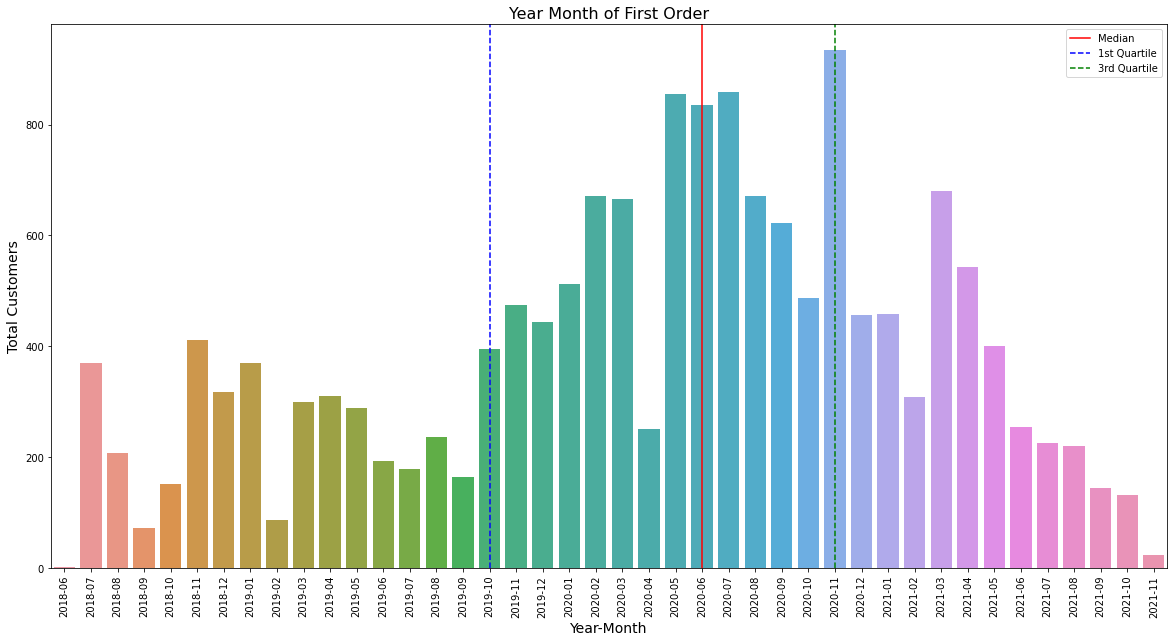

In [15]:
customer['year_month_oldest'] = customer['First_Order'].dt.to_period('M')
series = customer.groupby('year_month_oldest')['First_Order'].count()
df = series.to_frame().reset_index().sort_values('year_month_oldest')
def get_3Q():
    counter = 0
    for i in range(len(df['First_Order'])):   
        counter += df['First_Order'][i]
        if counter >= 0.75 * df['First_Order'].sum(): 
            return(df['First_Order'].index[i])
            break
def get_1Q():
    counter = 0
    for i in range(len(df['First_Order'])):   
        counter += df['First_Order'][i]
        if counter >= df['First_Order'].sum()/4: 
            return(df['First_Order'].index[i])
            break
def get_median():
    counter = 0
    for i in range(len(df['First_Order'])):   
        counter += df['First_Order'][i]
        if counter > df['First_Order'].sum()/2: 
            return(df['First_Order'].index[i])
            break
            
plt.figure(figsize=(20,10))
chart = sns.countplot(x= 'year_month_oldest', data = customer.sort_values('year_month_oldest'))
plt.xlabel('Year-Month', fontsize=14)
plt.ylabel('Total Customers', fontsize=14)
plt.title('Year Month of First Order', fontsize=16)
chart.set_xticklabels(chart.get_xticklabels(),rotation =90)
plt.axvline(get_median(), color ='r', label = 'Median')
plt.axvline(get_1Q(), color ='b', label = '1st Quartile',linestyle='--')
plt.axvline(get_3Q(), color ='g', label = '3rd Quartile',linestyle='--')
plt.legend()
plt.show()

This visualization gives us a lot of important information. Half of all first orders were before June 2020 and 75% of them were before November 2020. It looks like the last month for which we have data available is Nov 2021. As a result, since we do appear to have a good amount of data that is well spread out, we can decide to calculate a 1 year CLTV interval, and we would be keeping 75% of our data by doing this. 

#### Visualizing the number of orders for repeat customers.

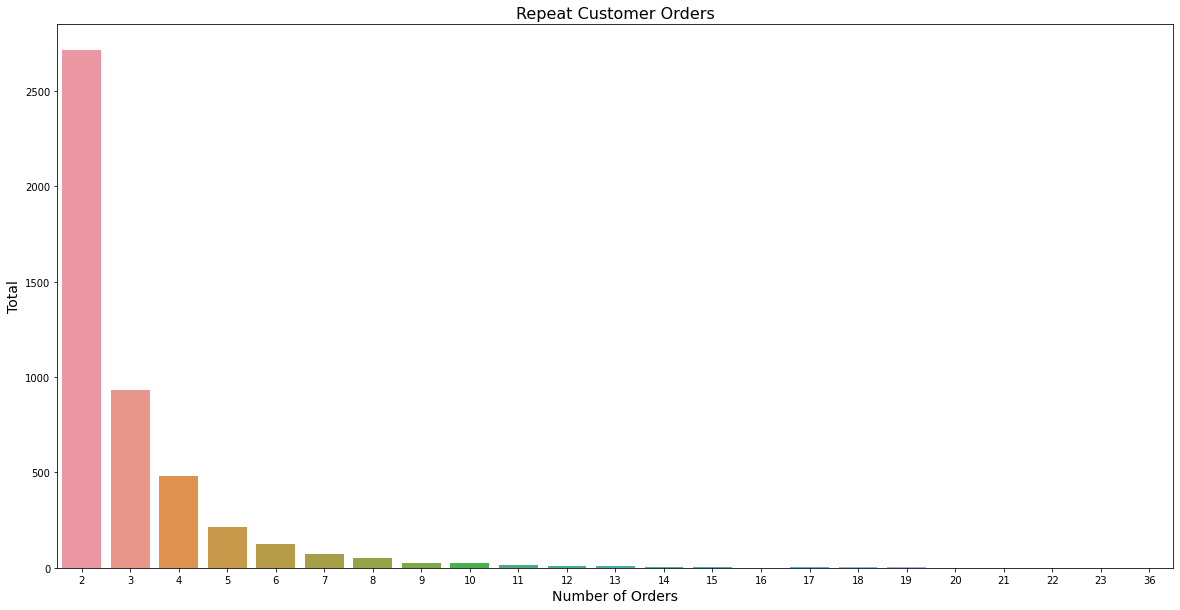

In [16]:
## Visualizing the repeat customers orders
_ = plt.figure(figsize=(20,10))
repeat_orders = customer[customer['Number_of_Orders'] > 1]
_ = sns.countplot(x= 'Number_of_Orders', data = repeat_orders)
_ = plt.xlabel('Number of Orders', fontsize=14)
_ = plt.ylabel('Total', fontsize=14)
_ = plt.title('Repeat Customer Orders', fontsize=16);
plt.show()

#### Visualizing the number of items purchased for repeat customers.

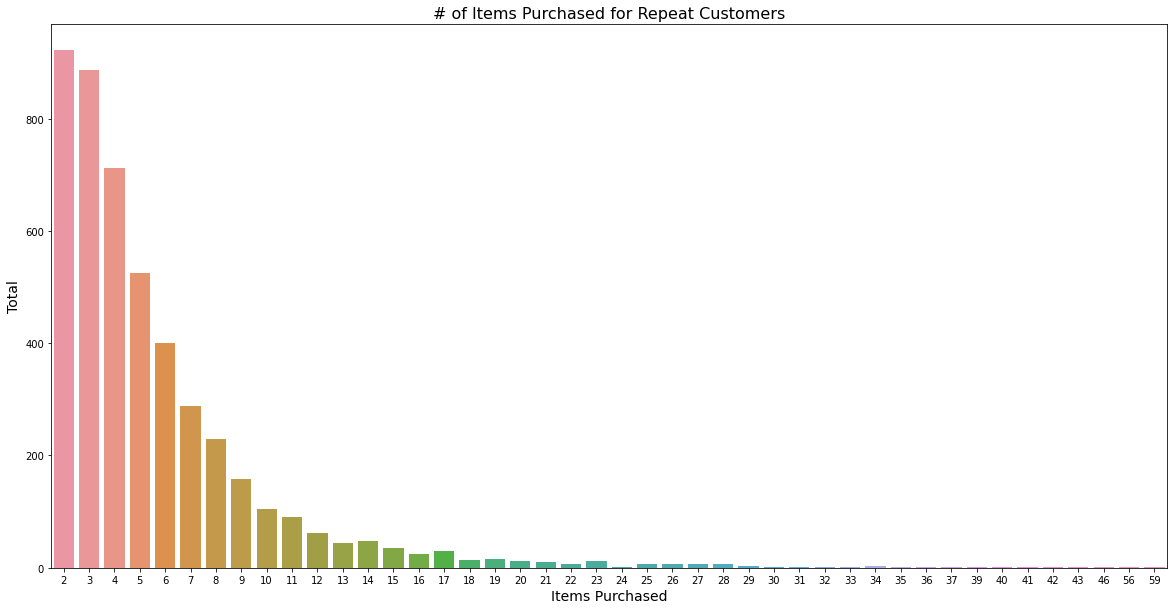

In [17]:
## Visualizing the number of items purchased for repeat customers. 
plt.figure(figsize=(20,10))
chart = sns.countplot(x= 'Total_Items_Purchased', data = repeat_orders)
_ = plt.xlabel('Items Purchased', fontsize=14)
_ = plt.ylabel('Total', fontsize=14)
_ = plt.title('# of Items Purchased for Repeat Customers', fontsize=16);

plt.show()

#### Visualizing the frequency of repeat customers. 

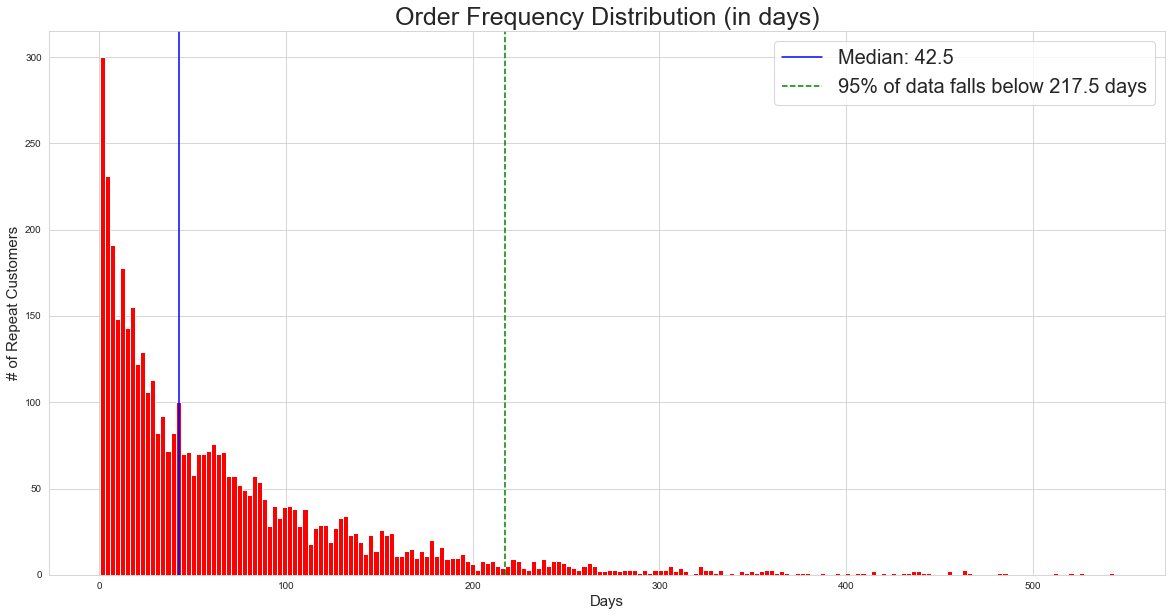

The average frequency of orders is ~ 67.0 days.
The median frequency of orders is ~  42.0 days.


In [18]:
sns.set_style("whitegrid")

frequency = customer[customer['Frequency_in_days'] >0]
mean = np.mean(frequency['Frequency_in_days'])
median = np.median(frequency['Frequency_in_days'])
upper_quartile = np.quantile(frequency['Frequency_in_days'],0.95)



ax = frequency['Frequency_in_days'].hist(bins = 200, figsize =(20,10), color ='r')
med_lab = 'Median: ' + str(median)
quant_lab = '95% of data falls below ' + str(upper_quartile) +' days'
plt.xlabel('Days', fontsize =15)
plt.ylabel('# of Repeat Customers', fontsize =15)
plt.title('Order Frequency Distribution (in days)', fontsize = 25)
plt.axvline(median, c='b', label = med_lab)
plt.axvline(upper_quartile, c='g', label = quant_lab, linestyle= '--')
plt.legend(fontsize =20)
plt.show()

print('The average frequency of orders is ~ ' + str(round(mean,0)) + ' days.')
print('The median frequency of orders is ~  ' + str(round(median,0)) + ' days.')

This tells us that a sizeable majority of repeat customers make purchases every month and a half and extremely few make an order above once a year. 

## Items Visualizations 
- Now we move on to our item visualizations.

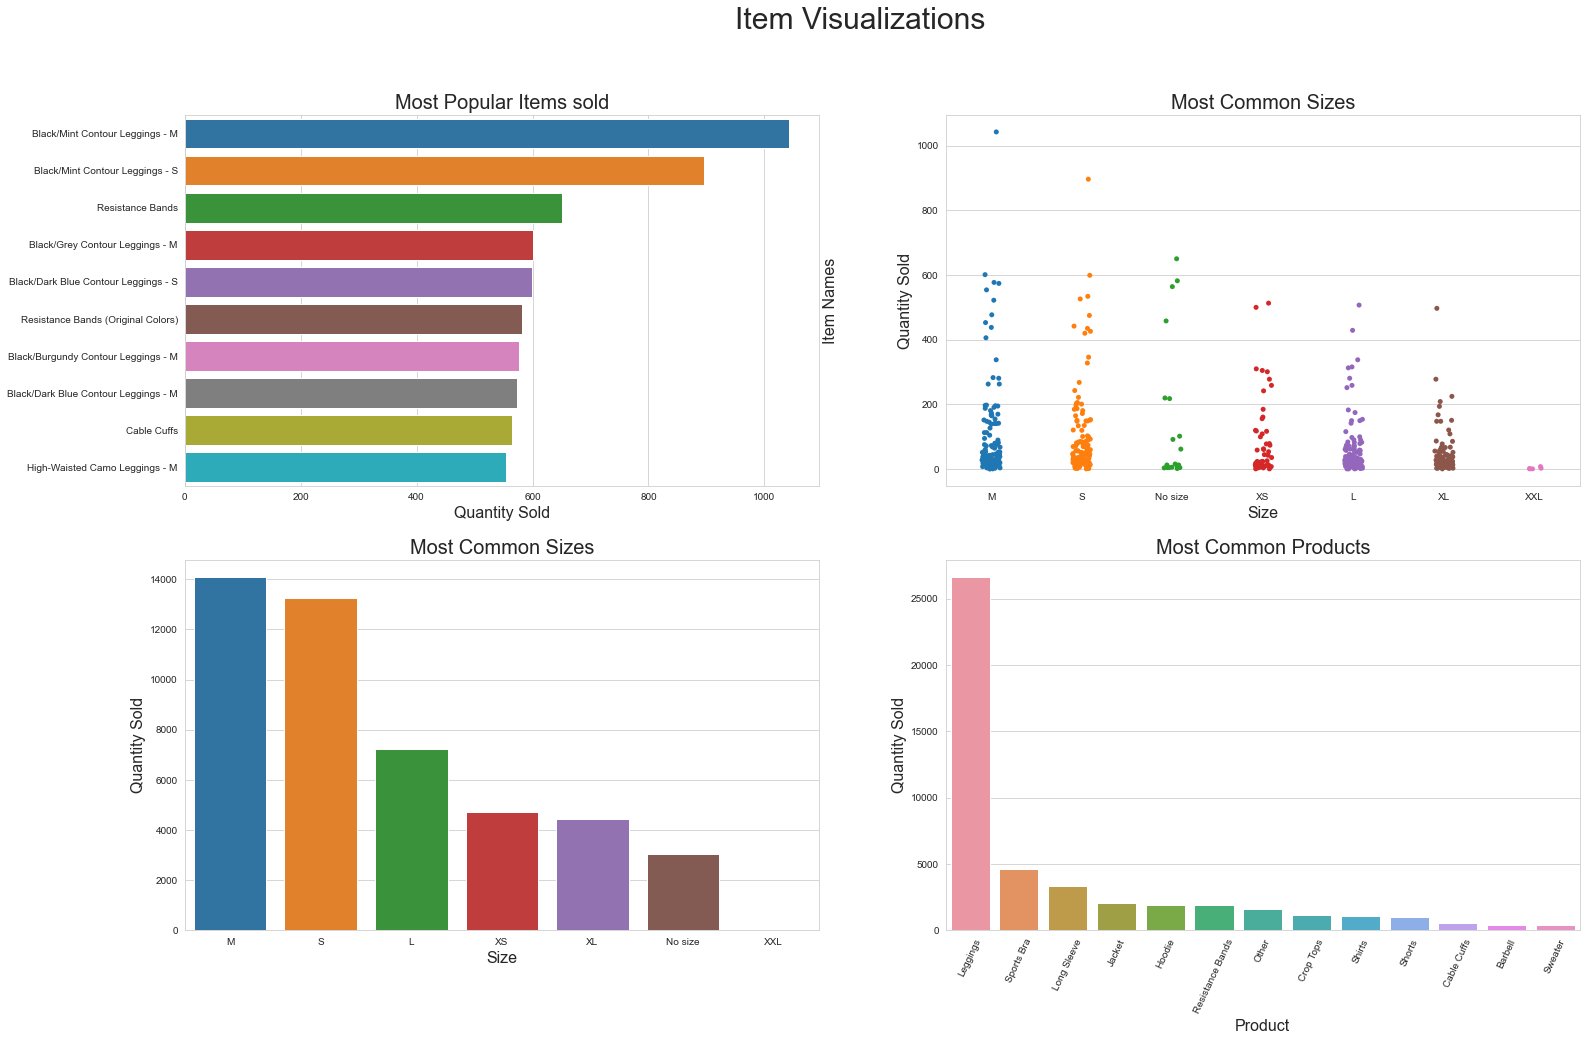

In [19]:
## We plot a couple of plots to get information about our items. 

fig, axes = plt.subplots(2,2, figsize=(25,15))
fig.suptitle('Item Visualizations', fontsize =30)

## 1) Barplot of Most Popular Items
sns.barplot(ax = axes[0,0], y= items['Lineitem name'][0:10], x='Times_Purchased', data = items)
axes[0,0].set_ylabel('Item Names', fontsize =16)
axes[0,0].yaxis.set_label_position('right')
axes[0,0].set_xlabel('Quantity Sold', fontsize =16)
axes[0,0].set_title('Most Popular Items sold', fontsize =20)

## 2) Barplot of Most Popular Items
sns.stripplot(ax =axes[0,1], x='size', y='Times_Purchased', data = items)
axes[0,1].set_ylabel('Quantity Sold', fontsize =16)
axes[0,1].set_xlabel('Size', fontsize =16)
axes[0,1].set_title('Most Common Sizes', fontsize =20)

## 3) Barplot of Most Popular Items
items_size = items.groupby(['size']).sum().reset_index().sort_values('Times_Purchased', ascending = False)
sns.barplot(ax =axes[1,0], x='size', y= 'Times_Purchased', data = items_size)
axes[1,0].set_ylabel('Quantity Sold', fontsize =16)
axes[1,0].set_xlabel('Size', fontsize =16)
axes[1,0].set_title('Most Common Sizes', fontsize =20)


## 4) Most Common Products
items_type = items.groupby(['type']).sum().reset_index().sort_values('Times_Purchased', ascending = False)
sns.barplot(ax =axes[1,1], x='type', y='Times_Purchased', data = items_type)
axes[1,1].set_ylabel('Quantity Sold', fontsize =16)
axes[1,1].set_xlabel('Product', fontsize =16)
axes[1,1].set_xticklabels(items_type['type'],fontsize =10, rotation =65)
axes[1,1].set_title('Most Common Products', fontsize =20)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
plt.show()

## Preliminary EDA Findings Summary and next steps:
- Since the first order for customers is equally distributed, and 75% of orders were made before Nov-2020, we can calculate a **CLTV over 1 year** and discard the customers who made their first order after Nov-2020. We will only be losing ~25% of our data which is fine. 
- The majority of items sold are leggings (more than all other products combined). Therefore, it might be more interesting to refine the Product type category and break down the leggings even further to see if some of them sell better than others. 